# Data Augmentation
* https://keras.io/preprocessing/image/
* https://datascience.stackexchange.com/questions/5224/how-to-prepare-augment-images-for-neural-network
* http://machinelearningmastery.com/image-augmentation-deep-learning-keras/

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pylab as plt
import numpy as np

In [4]:
from distutils.version import StrictVersion

In [5]:
import sklearn
print(sklearn.__version__)

assert StrictVersion(sklearn.__version__ ) >= StrictVersion('0.18.1')

0.19.0


In [6]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
print(tf.__version__)

assert StrictVersion(tf.__version__) >= StrictVersion('1.1.0')

1.2.1


In [7]:
import keras
print(keras.__version__)

assert StrictVersion(keras.__version__) >= StrictVersion('2.0.0')

Using TensorFlow backend.


2.0.8


## Originalen Datensatz laden

In [8]:
# !curl -O https://raw.githubusercontent.com/DJCordhose/speed-limit-signs/master/data/speed-limit-signs.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1810k  100 1810k    0     0  3073k      0 --:--:-- --:--:-- --:--:-- 3255k


In [8]:
!rm -r speed-limit-signs
# https://docs.python.org/3/library/zipfile.html
from zipfile import ZipFile
zip = ZipFile(r'speed-limit-signs.zip')
zip.extractall('.')

rm: cannot remove 'speed-limit-signs': No such file or directory


In [9]:
!ls -lh

total 2.8G
-rwxrwxrwx 1 root root 140K Sep 25 18:06 cnn-augmentation.ipynb
-rwxrwxrwx 1 root root 1.6M Sep 25 14:57 cnn-comparing-all-models.ipynb
-rwxrwxrwx 1 root root 380K Sep 25 15:46 cnn-intro.ipynb
-rwxrwxrwx 1 root root 1.3M Sep 25 14:57 cnn-prediction.ipynb
-rwxrwxrwx 1 root root 198K Sep 25 14:57 cnn-train-augmented.ipynb
drwxrwxrwx 0 root root  512 Sep 25 18:06 __MACOSX
-rwxrwxrwx 1 root root 113K Sep 25 17:14 nn-intro.ipynb
-rwxrwxrwx 1 root root   63 Sep 25 14:57 README.html
-rwxrwxrwx 1 root root   36 Aug  3 21:15 sample_iris.json
drwxrwxrwx 0 root root  512 Sep 25 18:06 speed-limit-signs
-rwxrwxrwx 1 root root 1.8M Mar  5  2017 speed-limit-signs.zip
-rwxrwxrwx 1 root root 6.9K Sep 25 18:05 workshop.ipynb


## Wir erkunden Keras' ImageDataGenerator

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
# ImageDataGenerator?

In [12]:
train_dir = 'speed-limit-signs'
generated_train_dir = 'generated'

In [13]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.4,
    horizontal_flip=False,
    vertical_flip=False,    
    fill_mode='nearest')

# train_dir = 'speed-limit-signs/0'
train_dir = 'speed-limit-signs/5'
number_of_transformations = 10

rm: cannot remove 'generated': No such file or directory
Found 0 images belonging to 0 classes.


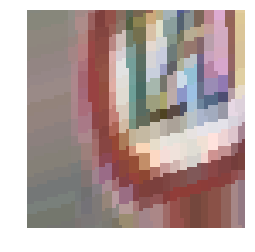

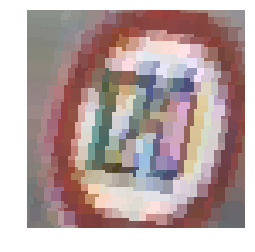

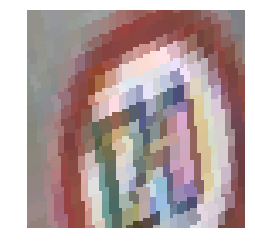

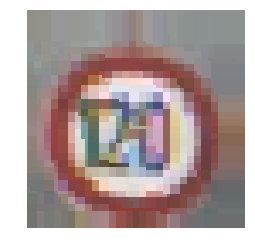

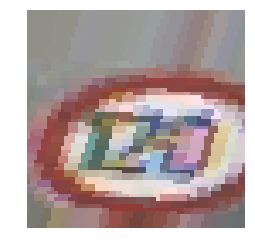

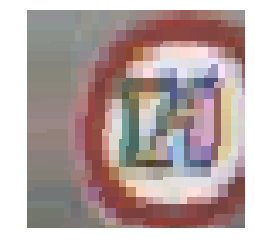

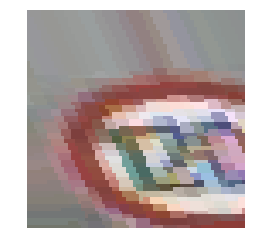

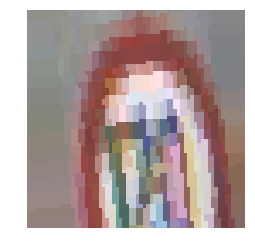

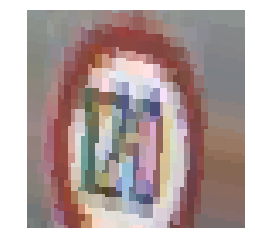

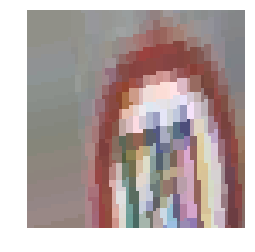

In [14]:
!rm -r generated
!mkdir generated

import os
from keras.preprocessing import image
import matplotlib
import matplotlib.pyplot as plt

datagen.flow_from_directory(
        train_dir,
        target_size=(64, 64),
        batch_size=32,
        save_to_dir=generated_train_dir
)

fnames = [os.path.join(train_dir, fname) for fname in os.listdir(train_dir)]

img_path = fnames[0] # We pick one image to "augment"

img = image.load_img(img_path, target_size=(64, 64)) # Read the image and resize it

x = image.img_to_array(img) # Convert it to a Numpy array with shape (64, 64, 3)

x = x.reshape((1,) + x.shape) # Reshape it to (1, 64, 64, 3)

# plt.figure(figsize=(15, 15))

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 1
for batch in datagen.flow(x):
    plt.figure(i)
#     pillow image: http://pillow.readthedocs.io/en/3.4.x/reference/Image.html
    img = image.array_to_img(batch[0])
    fname = 'generated/augmented_{index}.png'.format(index=i)
    img.save(fname)
    plt.imshow(img)
#     plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
    plt.axis('off')
    if i % number_of_transformations == 0:
        break
    i += 1
plt.show()

In [15]:
!ls -lh generated/

total 21M
-rwxrwxrwx 1 root root 2.8K Sep 25 18:08 augmented_10.png
-rwxrwxrwx 1 root root 2.4K Sep 25 18:08 augmented_1.png
-rwxrwxrwx 1 root root 3.5K Sep 25 18:08 augmented_2.png
-rwxrwxrwx 1 root root 3.5K Sep 25 18:08 augmented_3.png
-rwxrwxrwx 1 root root 2.7K Sep 25 18:08 augmented_4.png
-rwxrwxrwx 1 root root 3.2K Sep 25 18:08 augmented_5.png
-rwxrwxrwx 1 root root 2.3K Sep 25 18:08 augmented_6.png
-rwxrwxrwx 1 root root 3.4K Sep 25 18:08 augmented_7.png
-rwxrwxrwx 1 root root 2.7K Sep 25 18:08 augmented_8.png
-rwxrwxrwx 1 root root 3.3K Sep 25 18:08 augmented_9.png


---

# Hands-On
## Experimentiere mit den Parametern von ImageDataGenerator
* Ändere die Parameter beim erzeugen des ImageDataGenerator
* Welche Parameter geben gute Ergebnisse? Kann man die Bilder noch erkennen?
* Ändere die Anzahl der Transformationen in der Variablen *number_of_transformations*
* Ändere die Kategorie des Schild auf dem die Transformation durchgeführt wird in der Variablen *train_dir*

---

## Transformation aller Schilder mit unserem handoptimierten ImageDataGenerator

In [16]:
def traverse(root_dir, 
             category_callback=lambda category_dir, category: print(category_dir, category),
             image_callback=lambda path, directory, basename: print(path, directory, basename)):
    directories = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        category_callback(label_dir, d)
        file_names = [f for f in os.listdir(label_dir) if f.endswith(".ppm")]
        for f in file_names:
            path = os.path.join(label_dir, f)
            basename = os.path.splitext(f)[0]
            image_callback(path, d, basename)

In [17]:
# so können wir durch alle Ordner mit allen Schildern durchgehen
ROOT_PATH = "./"
data_dir = os.path.join(ROOT_PATH, "speed-limit-signs")
# traverse(data_dir)

In [18]:
# oder eben alle Bilder in den Ordnern transformieren
# Vorsicht: auf Azure Notebooks, kann das hier ewig dauern
def augment_image(input_path, output_dir, output_name, number_of_transformations=10, plot=False):
    img = image.load_img(input_path, target_size=(64, 64))
    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape) # Reshape it to (1, 64, 64, 3)
    i = 1
    for batch in datagen.flow(x):
        if plot:
            plt.figure(i)
    #     pillow image: http://pillow.readthedocs.io/en/3.4.x/reference/Image.html
        img = image.array_to_img(batch[0])
        if plot:
            plt.imshow(img)
    #     plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
            plt.axis('off')
        else:
            output_path = '{dir}/{name}_{index}.png'.format(index=i, dir=output_dir, name=output_name)
            img.save(output_path)

        if i % number_of_transformations == 0:
            break
        i += 1
    if plot:
        plt.show()

generated_train_dir = 'augmented-signs'
!rm -r augmented-signs
!mkdir augmented-signs

traverse(data_dir, 
         category_callback=lambda category_dir, category: os.makedirs(os.path.join(generated_train_dir, category)) if not os.path.exists(os.path.join(generated_train_dir, category)) else None,
         image_callback=lambda path, category, basename: augment_image(path, os.path.join(generated_train_dir, category), basename)
        )        

rm: cannot remove 'augmented-signs': No such file or directory


In [19]:
!ls -lh augmented-signs

total 449M
drwxrwxrwx 0 root root 512 Sep 25 18:09 0
drwxrwxrwx 0 root root 512 Sep 25 18:09 1
drwxrwxrwx 0 root root 512 Sep 25 18:10 2
drwxrwxrwx 0 root root 512 Sep 25 18:10 3
drwxrwxrwx 0 root root 512 Sep 25 18:10 4
drwxrwxrwx 0 root root 512 Sep 25 18:10 5


In [20]:
!ls -lh augmented-signs/0

total 2.6G
-rwxrwxrwx 1 root root 4.5K Sep 25 18:09 00000_10.png
-rwxrwxrwx 1 root root 5.8K Sep 25 18:09 00000_1.png
-rwxrwxrwx 1 root root 4.2K Sep 25 18:09 00000_2.png
-rwxrwxrwx 1 root root 6.6K Sep 25 18:09 00000_3.png
-rwxrwxrwx 1 root root 4.6K Sep 25 18:09 00000_4.png
-rwxrwxrwx 1 root root 5.3K Sep 25 18:09 00000_5.png
-rwxrwxrwx 1 root root 6.6K Sep 25 18:09 00000_6.png
-rwxrwxrwx 1 root root 5.4K Sep 25 18:09 00000_7.png
-rwxrwxrwx 1 root root 5.5K Sep 25 18:09 00000_8.png
-rwxrwxrwx 1 root root 5.7K Sep 25 18:09 00000_9.png
-rwxrwxrwx 1 root root 5.6K Sep 25 18:09 00001_10.png
-rwxrwxrwx 1 root root 4.9K Sep 25 18:09 00001_1.png
-rwxrwxrwx 1 root root 4.7K Sep 25 18:09 00001_2.png
-rwxrwxrwx 1 root root 5.4K Sep 25 18:09 00001_3.png
-rwxrwxrwx 1 root root 4.8K Sep 25 18:09 00001_4.png
-rwxrwxrwx 1 root root 4.2K Sep 25 18:09 00001_5.png
-rwxrwxrwx 1 root root 3.7K Sep 25 18:09 00001_6.png
-rwxrwxrwx 1 root root 5.2K Sep 25 18:09 00001_7.png
-rwxrwxrwx 1 root root 4.7K Sep 2

-rwxrwxrwx 1 root root 3.0K Sep 25 18:09 00058_10.png
-rwxrwxrwx 1 root root 3.1K Sep 25 18:09 00058_1.png
-rwxrwxrwx 1 root root 3.7K Sep 25 18:09 00058_2.png
-rwxrwxrwx 1 root root 4.0K Sep 25 18:09 00058_3.png
-rwxrwxrwx 1 root root 3.7K Sep 25 18:09 00058_4.png
-rwxrwxrwx 1 root root 4.2K Sep 25 18:09 00058_5.png
-rwxrwxrwx 1 root root 2.5K Sep 25 18:09 00058_6.png
-rwxrwxrwx 1 root root 3.6K Sep 25 18:09 00058_7.png
-rwxrwxrwx 1 root root 3.1K Sep 25 18:09 00058_8.png
-rwxrwxrwx 1 root root 3.8K Sep 25 18:09 00058_9.png
-rwxrwxrwx 1 root root 5.0K Sep 25 18:09 00059_10.png
-rwxrwxrwx 1 root root 3.3K Sep 25 18:09 00059_1.png
-rwxrwxrwx 1 root root 4.3K Sep 25 18:09 00059_2.png
-rwxrwxrwx 1 root root 3.0K Sep 25 18:09 00059_3.png
-rwxrwxrwx 1 root root 4.3K Sep 25 18:09 00059_4.png
-rwxrwxrwx 1 root root 4.3K Sep 25 18:09 00059_5.png
-rwxrwxrwx 1 root root 4.6K Sep 25 18:09 00059_6.png
-rwxrwxrwx 1 root root 4.1K Sep 25 18:09 00059_7.png
-rwxrwxrwx 1 root root 4.5K Sep 25 18:09 000

In [21]:
!rm augmented-signs.zip
!zip -r augmented-signs.zip augmented-signs >/dev/null

In [22]:
!ls -lh

total 9.5G
drwxrwxrwx 0 root root  512 Aug 30 13:16 augmented-signs
-rwxrwxrwx 1 root root  17M Aug 30 13:16 augmented-signs.zip
-rwxrwxrwx 1 root root  12K Aug 30 13:15 cnn-augmention.ipynb
-rwxrwxrwx 1 root root  32K Aug 30 10:01 CNN-Full.ipynb
-rwxrwxrwx 1 root root 121K Aug 30 10:01 CNN.ipynb
-rwxrwxrwx 1 root root 110K Aug 30 10:01 CNN-Mixed.ipynb
-rwxrwxrwx 1 root root  98K Aug 30 10:01 CNN-Original.ipynb
-rwxrwxrwx 1 root root  25K Aug 30 13:15 cnn-train-augmented.ipynb
drwxrwxrwx 0 root root  512 Aug 30 13:15 generated
drwxrwxrwx 0 root root  512 Aug 30 10:27 __MACOSX
-rwxrwxrwx 1 root root   36 Aug  3 21:15 sample_iris.json
drwxrwxrwx 0 root root  512 Aug 30 13:15 speed-limit-signs
-rwxrwxrwx 1 root root 1.8M Aug 30 13:15 speed-limit-signs.zip


In [23]:
!curl --upload-file augmented-signs.zip https://transfer.sh/augmented-signs.zip

https://transfer.sh/1dtQq/augmented-signs.zip